# Assignment 11

### Question 1

In [2]:
library(readr)
library(rpart)
library(rattle)
library(caret)
library(ranger)
library(e1071)
a11 = read.csv("~/Fall Semester 2018/Statistical Analysis with R/Assignments/Assignment 11/adult (1).csv", header=FALSE, na.strings = c(" ?", "NA", "."))
names(a11) = c("Age", "WorkingClass", "FinalWeight", "Education", "Ed", "MaritalStatus", "Occupation", "Relationship", "Race", "Sex", "Gains", "Losses", "AvgHrsWeek", "Country", "target")

Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.
Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ranger'

The following object is masked from 'package:rattle':

    importance



### Question 2-3

In [3]:
for(i in 1:ncol(a11)) 
    {
    a11[a11 ==" ?"]= NA  
    missval <- sum(is.na(a11[i]))
    if(missval > 0)
      {
      if(is.numeric(a11[[i]]) == FALSE) 
        {
        levels=unique(a11[,i])
        a11[,i][is.na(a11[,i])]=levels[which.max(tabulate(match(a11[,i], x = levels)))]
      }
      else
      {
        a11 <- preProcess(a11, method='medianImpute')
      }
    }
}

### Question 4

In [15]:
levels(a11$Country) = c("A", "N", "A", "S", "I", "I", "S", "S", "E", "E", "E","E", "S", "I", "E", "S", "A", "E", "A", "A", "A", "E", "E", "I", "A", "A", "N", "S", "I", "S", "A", "E", "E", "I", "E", "I", "A", "A", "I", "N", "A", "E")
levels(a11$Education) = c("HS", "HS", "HS", "ES", "ES", "ES", "HS", "A", "A", "U", "G", "HS", "G", "ES", "U", "A")
levels(a11$Occupation) = c("A", "A", "A", "B", "B", "B", "C", "C", "C", "D", "D", "D", "E", "E")

### Question 5-6

In [16]:
dummies_a11 <- dummyVars(target ~ ., data=a11)
a11cs <- preProcess(a11, method= c("center", "scale"))

### Question 7

Accuracy 
0.8456183

Balanced Accuracy 
        0.7414065

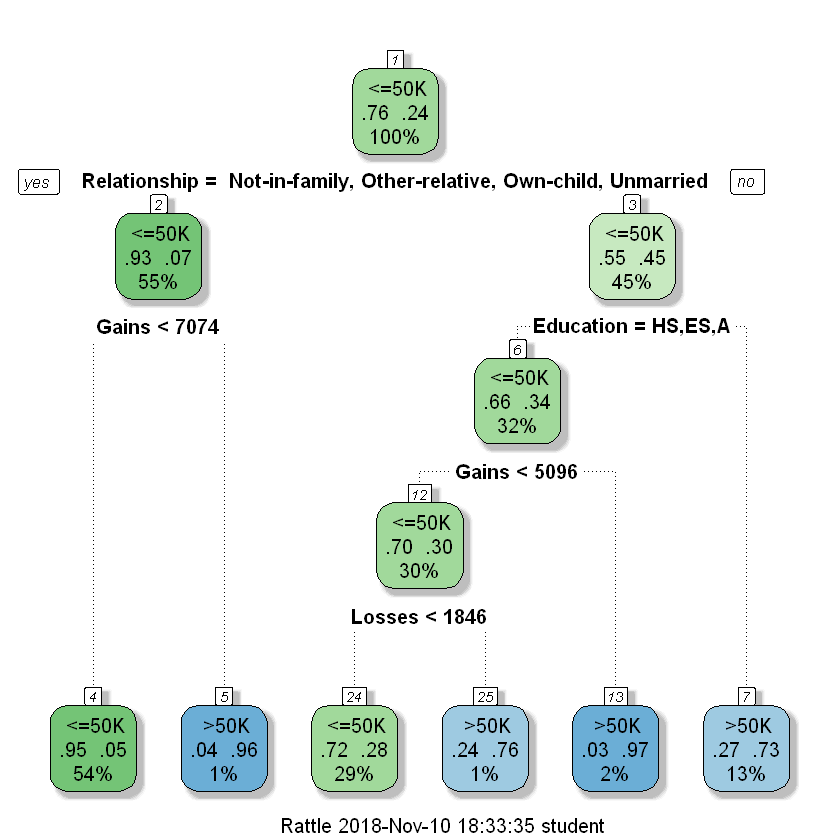

In [18]:
set.seed(2018)
splitIndex <- createDataPartition(a11$target, p = .70, list = FALSE, times = 1)
train <- a11[ splitIndex,]
test <- a11[-splitIndex,]
mytree <- rpart(target ~ ., data = train, method = "class")
fancyRpartPlot(mytree)
pred <- predict(mytree,test, type = "class")
cm=confusionMatrix(pred,test$target, positive = " >50K")
cm$overall["Accuracy"]
cm$byClass["Balanced Accuracy"]

### Question 8

In [20]:
model = ranger(target ~., data = train)
pred3  = predict(model, data = test)$predictions
levels(test$target) = c("0", "1")
levels(pred3) = c("0", "1")
cm3=confusionMatrix(pred3, test$target, positive="1")
cm3$overall["Accuracy"]
cm3$byClass["Balanced Accuracy"]

Accuracy 
0.8584152

Balanced Accuracy 
        0.7750926

### Question 9

Accuracy 
0.8456183

Balanced Accuracy 
        0.7414065

Accuracy 
0.8584152

Balanced Accuracy 
        0.7750926

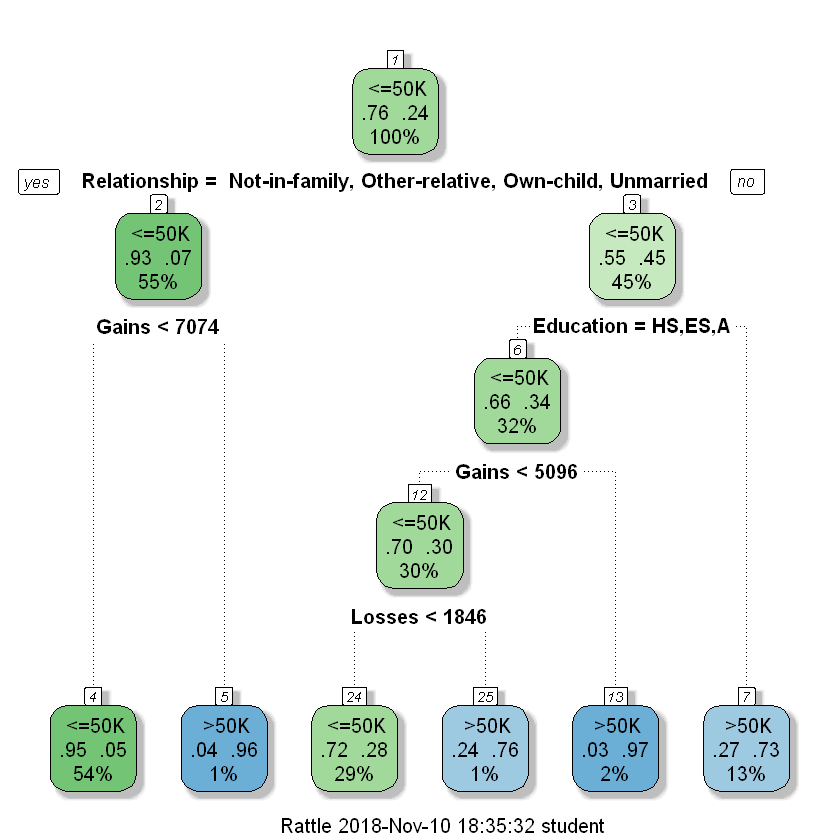

In [23]:
a119 = read.csv("~/Fall Semester 2018/Statistical Analysis with R/Assignments/Assignment 11/adult (1).csv", header=FALSE, na.strings = c(" ?", "NA", "."))
names(a119) = c("Age", "WorkingClass", "FinalWeight", "Education", "Ed", "MaritalStatus", "Occupation", "Relationship", "Race", "Sex", "Gains", "Losses", "AvgHrsWeek", "Country", "target")
for(i in 1:ncol(a119)) 
    {
    a119[a119 ==" ?"]= NA  
    missval <- sum(is.na(a119[i]))
    if(missval > 0)
      {
      if(is.numeric(a119[[i]]) == FALSE) 
        {
        levels=unique(a119[,i])
        a119[,i][is.na(a119[,i])]=levels[which.max(tabulate(match(a119[,i], x = levels)))]
      }
      else
      {
        a119[[i]][is.na(a119[[i]])] <- mean(a119[[i]], na.rm = TRUE)
      }
    }
}
levels(a119$Country) = c("A", "N", "A", "S", "I", "I", "S", "S", "E", "E", "E","E", "S", "I", "E", "S", "A", "E", "A", "A", "A", "E", "E", "I", "A", "A", "N", "S", "I", "S", "A", "E", "E", "I", "E", "I", "A", "A", "I", "N", "A", "E")
levels(a119$Education) = c("HS", "HS", "HS", "ES", "ES", "ES", "HS", "A", "A", "U", "G", "HS", "G", "ES", "U", "A")
levels(a119$Occupation) = c("A", "A", "A", "B", "B", "B", "C", "C", "C", "D", "D", "D", "E", "E")
set.seed(2018)
splitIndex9 <- createDataPartition(a119$target, p = .70, list = FALSE, times = 1)
train9 <- a119[ splitIndex9,]
test9 <- a119[-splitIndex9,]
mytree9 <- rpart(target ~ ., data = train9, method = "class")
fancyRpartPlot(mytree9)
pred9 <- predict(mytree9,test9, type = "class")
cm9=confusionMatrix(pred9,test9$target, positive = " >50K")
cm9$overall["Accuracy"]
cm9$byClass["Balanced Accuracy"]
model9 = ranger(target ~., data = train9)
pred39  = predict(model9, data = test9)$predictions
levels(test9$target) = c("0", "1")
levels(pred39) = c("0", "1")
cm39=confusionMatrix(pred39, test9$target, positive="1")
cm39$overall["Accuracy"]
cm39$byClass["Balanced Accuracy"]

### Question 10

Accuracy 
0.8456183

Balanced Accuracy 
        0.7414065

Accuracy 
0.8584152

Balanced Accuracy 
        0.7750926

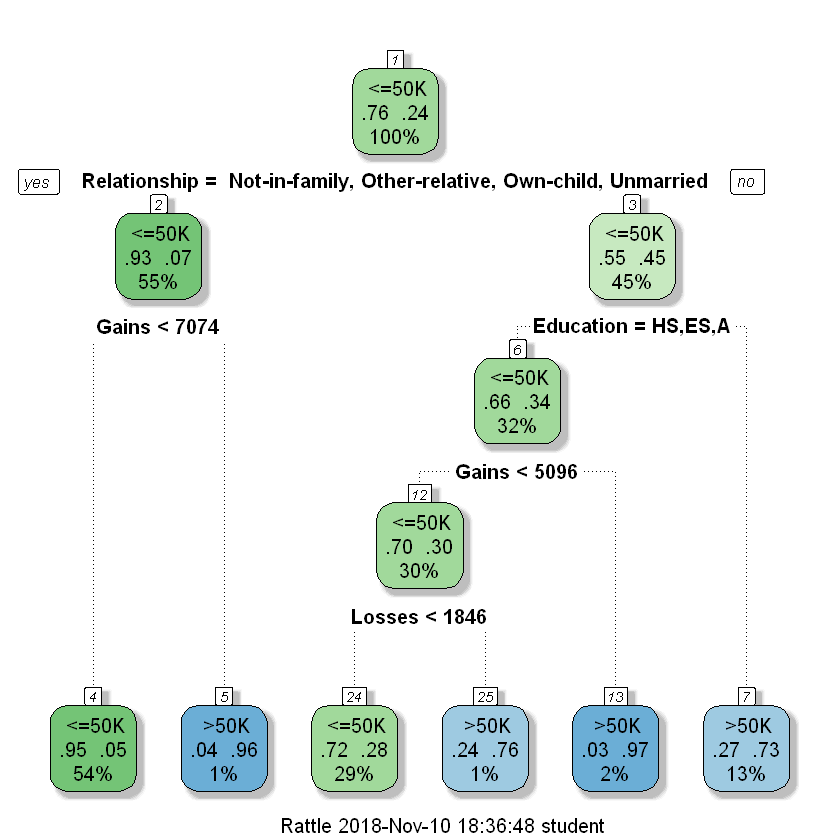

In [25]:
a119 = read.csv("~/Fall Semester 2018/Statistical Analysis with R/Assignments/Assignment 11/adult (1).csv", header=FALSE, na.strings = c(" ?", "NA", "."))
names(a119) = c("Age", "WorkingClass", "FinalWeight", "Education", "Ed", "MaritalStatus", "Occupation", "Relationship", "Race", "Sex", "Gains", "Losses", "AvgHrsWeek", "Country", "target")
for(i in 1:ncol(a119)) 
    {
    a119[a119 ==" ?"]= NA  
    missval <- sum(is.na(a119[i]))
    if(missval > 0)
      {
      if(is.numeric(a119[[i]]) == FALSE) 
        {
        levels=unique(a119[,i])
        a119[,i][is.na(a119[,i])]=levels[which.max(tabulate(match(a119[,i], x = levels)))]
      }
      else
      {
        a119 <- preProcess(a119, method='knnImpute')
      }
    }
}
levels(a119$Country) = c("A", "N", "A", "S", "I", "I", "S", "S", "E", "E", "E","E", "S", "I", "E", "S", "A", "E", "A", "A", "A", "E", "E", "I", "A", "A", "N", "S", "I", "S", "A", "E", "E", "I", "E", "I", "A", "A", "I", "N", "A", "E")
levels(a119$Education) = c("HS", "HS", "HS", "ES", "ES", "ES", "HS", "A", "A", "U", "G", "HS", "G", "ES", "U", "A")
levels(a119$Occupation) = c("A", "A", "A", "B", "B", "B", "C", "C", "C", "D", "D", "D", "E", "E")
set.seed(2018)
splitIndex9 <- createDataPartition(a119$target, p = .70, list = FALSE, times = 1)
train9 <- a119[ splitIndex9,]
test9 <- a119[-splitIndex9,]
mytree9 <- rpart(target ~ ., data = train9, method = "class")
fancyRpartPlot(mytree9)
pred9 <- predict(mytree9,test9, type = "class")
cm9=confusionMatrix(pred9,test9$target, positive = " >50K")
cm9$overall["Accuracy"]
cm9$byClass["Balanced Accuracy"]
model9 = ranger(target ~., data = train9)
pred39  = predict(model9, data = test9)$predictions
levels(test9$target) = c("0", "1")
levels(pred39) = c("0", "1")
cm39=confusionMatrix(pred39, test9$target, positive="1")
cm39$overall["Accuracy"]
cm39$byClass["Balanced Accuracy"]

### Question 11

Accuracy 
0.8456183

Balanced Accuracy 
        0.7414065

Accuracy 
0.8584152

Balanced Accuracy 
        0.7750926

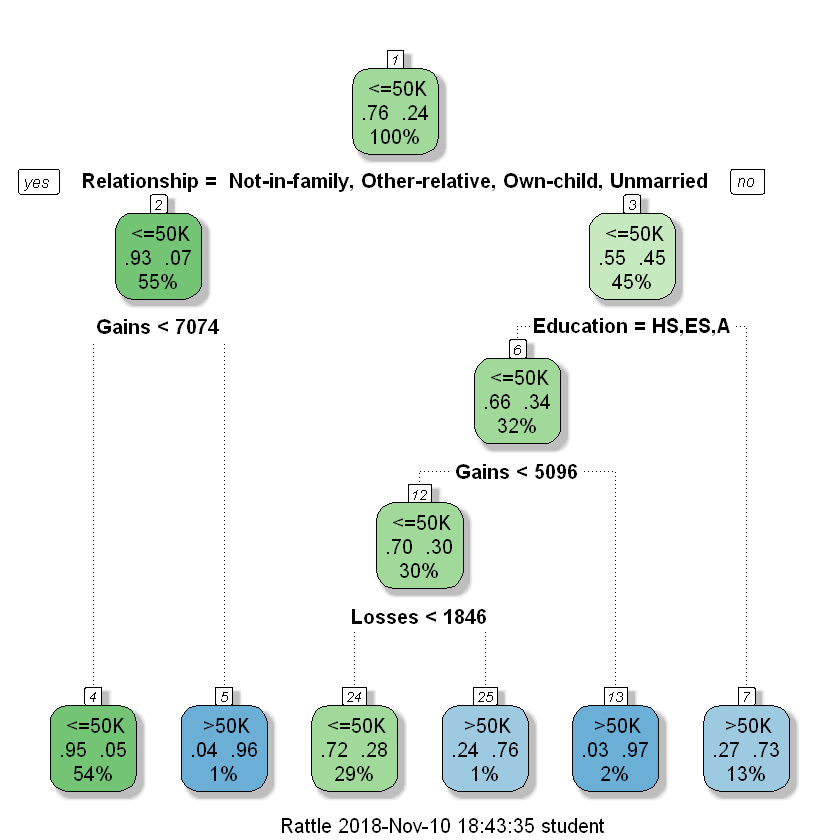

In [4]:
a119 = read.csv ("~/Fall Semester 2018/Statistical Analysis with R/Assignments/Assignment 11/adult (1).csv", header=FALSE, na.strings = c(" ?", "NA", "."))
names(a119) = c("Age", "WorkingClass", "FinalWeight", "Education", "Ed", "MaritalStatus", "Occupation", "Relationship", "Race", "Sex", "Gains", "Losses", "AvgHrsWeek", "Country", "target")
for(i in 1:ncol(a119)) 
    {
    a119[a119 ==" ?"]= NA  
    missval <- sum(is.na(a119[i]))
    if(missval > 0)
      {
      if(is.numeric(a119[[i]]) == FALSE) 
        {
        levels=unique(a119[,i])
        a119[,i][is.na(a119[,i])]=levels[which.max(tabulate(match(a119[,i], x = levels)))]
      }
      else
      {
        a119 <- preProcess(a119, method='medianImpute')
      }
    }
}
levels(a119$Country) = c("A", "N", "A", "S", "I", "I", "S", "S", "E", "E", "E","E", "S", "I", "E", "S", "A", "E", "A", "A", "A", "E", "E", "I", "A", "A", "N", "S", "I", "S", "A", "E", "E", "I", "E", "I", "A", "A", "I", "N", "A", "E")
levels(a119$Education) = c("HS", "HS", "HS", "ES", "ES", "ES", "HS", "A", "A", "U", "G", "HS", "G", "ES", "U", "A")
levels(a119$Occupation) = c("A", "A", "A", "B", "B", "B", "C", "C", "C", "D", "D", "D", "E", "E")
a119cs <- preProcess(a119, method= c("center", "scale"))
dummies_a11 <- dummyVars(target ~ ., data=a11)
set.seed(2018)
splitIndex9 <- createDataPartition(a119$target, p = .70, list = FALSE, times = 1)
train9 <- a119[ splitIndex9,]
test9 <- a119[-splitIndex9,]
mytree9 <- rpart(target ~ ., data = train9, method = "class")
fancyRpartPlot(mytree9)
pred9 <- predict(mytree9,test9, type = "class")
cm9=confusionMatrix(pred9,test9$target, positive = " >50K")
cm9$overall["Accuracy"]
cm9$byClass["Balanced Accuracy"]
model9 = ranger(target ~., data = train9)
pred39  = predict(model9, data = test9)$predictions
levels(test9$target) = c("0", "1")
levels(pred39) = c("0", "1")
cm39=confusionMatrix(pred39, test9$target, positive="1")
cm39$overall["Accuracy"]
cm39$byClass["Balanced Accuracy"]

### Question 12

In [1]:
#Code runs in RStudio but not in Jupyter Lab

### Question 13

Accuracy 
0.8424447

Balanced Accuracy 
         0.729155

Accuracy 
0.8619984

Balanced Accuracy 
        0.7796298

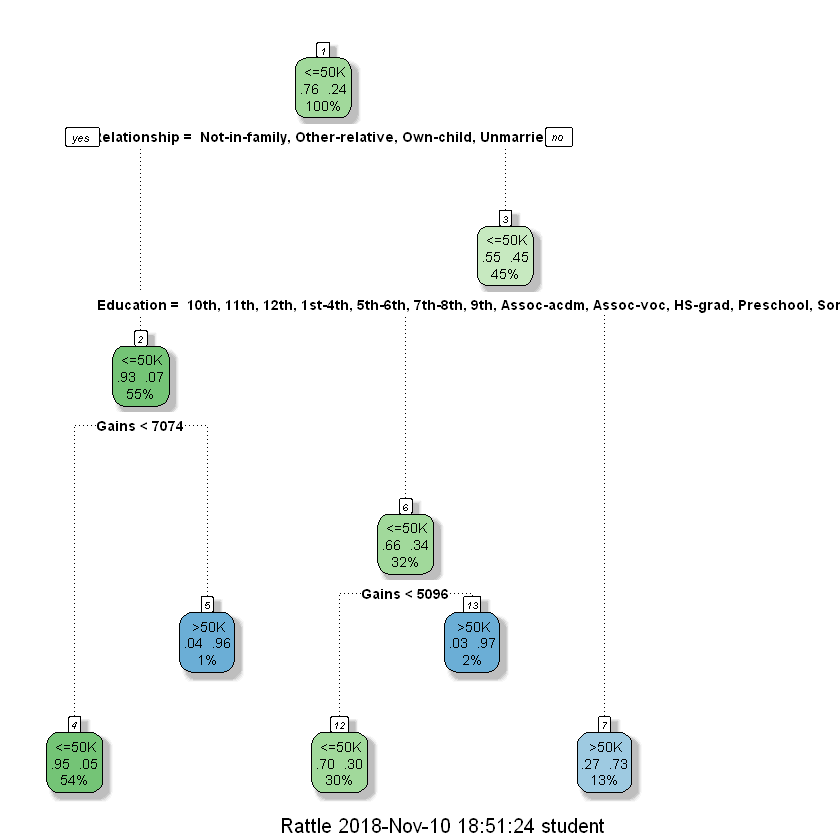

In [5]:
a119 = read.csv("~/Fall Semester 2018/Statistical Analysis with R/Assignments/Assignment 11/adult (1).csv", header=FALSE, na.strings = c(" ?", "NA", "."))
names(a119) = c("Age", "WorkingClass", "FinalWeight", "Education", "Ed", "MaritalStatus", "Occupation", "Relationship", "Race", "Sex", "Gains", "Losses", "AvgHrsWeek", "Country", "target")
for(i in 1:ncol(a119)) 
    {
    a119[a119 ==" ?"]= NA  
    missval <- sum(is.na(a119[i]))
    if(missval > 0)
      {
      if(is.numeric(a119[[i]]) == FALSE) 
        {
        levels=unique(a119[,i])
        a119[,i][is.na(a119[,i])]=levels[which.max(tabulate(match(a119[,i], x = levels)))]
      }
      else
      {
        a119 <- preProcess(a119, method='medianImpute')
      }
    }
}
set.seed(2018)
splitIndex9 <- createDataPartition(a119$target, p = .70, list = FALSE, times = 1)
train9 <- a119[ splitIndex9,]
test9 <- a119[-splitIndex9,]
mytree9 <- rpart(target ~ ., data = train9, method = "class")
fancyRpartPlot(mytree9)
pred9 <- predict(mytree9,test9, type = "class")
cm9=confusionMatrix(pred9,test9$target, positive = " >50K")
cm9$overall["Accuracy"]
cm9$byClass["Balanced Accuracy"]
model9 = ranger(target ~., data = train9)
pred39  = predict(model9, data = test9)$predictions
levels(test9$target) = c("0", "1")
levels(pred39) = c("0", "1")
cm39=confusionMatrix(pred39, test9$target, positive="1")
cm39$overall["Accuracy"]
cm39$byClass["Balanced Accuracy"]